In [2]:
# TODO: Find time complexities and exact time of solution methods

In [3]:
%matplotlib inline
# import matplotlib as mpl
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import itertools

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # # Use 10pt font in plots, to match 10pt font in document
    # "axes.labelsize": 11,
    # "font.size": 10,
    # # Make the legend/label fonts a little smaller
    # "legend.fontsize": 8,
    # "xtick.labelsize": 8,
    # "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

import numpy as np
from numpy.random import default_rng
rng = default_rng(257) # seed

# Task 1

In [4]:
# define matrix sizes
N = 500
p = 30

In [5]:
X = rng.random((N, p)) # design matrix
w = rng.random(p) # weights

In [6]:
y = X @ w + (rng.normal(0, 1, N))

In [7]:
# plt.scatter(y, X)

## Closed Form

In [8]:
w_closed = np.linalg.inv(X.T @ X) @ X.T @ y
# print(w_closed)

In [9]:
y_closed = X @ w_closed
# print('y_closed', y_closed)

[Text(0, 0.5, 'Estimated Weights'), Text(0.5, 0, 'True Weights')]

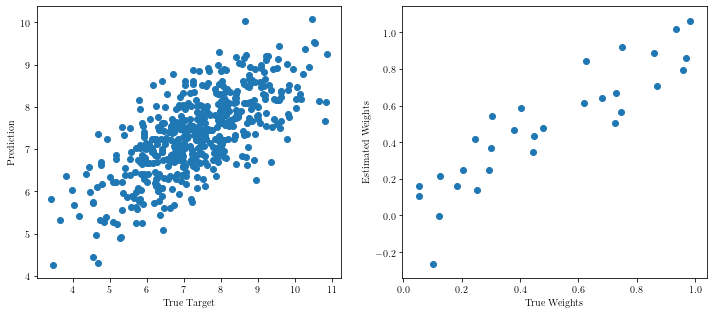

In [10]:
fig_closed, ax_closed = plt.subplots(1, 2, figsize=(12, 5))
ax_closed[0].scatter(y, y_closed)
ax_closed[0].set(xlabel='True Target', ylabel='Prediction')
ax_closed[1].scatter(w, w_closed)
ax_closed[1].set(xlabel='True Weights', ylabel='Estimated Weights')

In [11]:
fig_closed.savefig('report/Figures/closed.pdf')

## Gradient Descent

In [12]:
w_gd = rng.random(p) # initialise gd weights
learning_rate_gd = 1e-4
maxIter_gd = 500
iterError_gd = np.zeros(maxIter_gd+1)

iterError_gd[0] = (y - X@w_gd).T @ (y - X@w_gd)

for i in range(maxIter_gd):
    error_diff_gd = -2 * X.T @ (y - X@w_gd) # derivative of error
    w_gd -= learning_rate_gd * error_diff_gd # weight update
    iterError_gd[i+1] = (y - X@w_gd).T @ (y - X@w_gd) # error

y_gd = X @ w_gd

[Text(0, 0.5, 'Estimated Weights'), Text(0.5, 0, 'True Weights')]

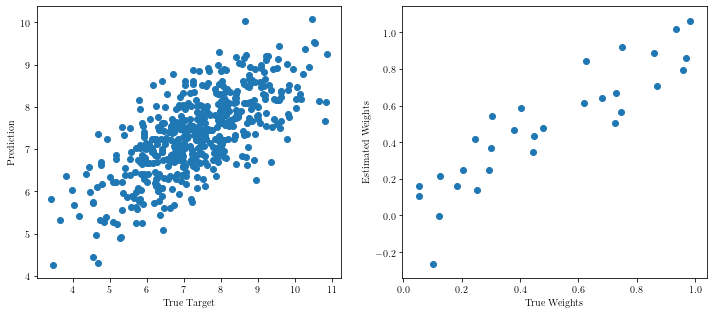

In [14]:
fig_gd_results, ax_gd_results = plt.subplots(1, 2, figsize=(12, 5))
ax_gd_results[0].scatter(y, y_closed)
ax_gd_results[0].set(xlabel='True Target', ylabel='Prediction')
ax_gd_results[1].scatter(w, w_closed)
ax_gd_results[1].set(xlabel='True Weights', ylabel='Estimated Weights')

In [15]:
fig_gd_results.savefig('report/Figures/gd_results.pdf')

Text(0.5, 1.0, 'Gradient Descent on Linear Regression')

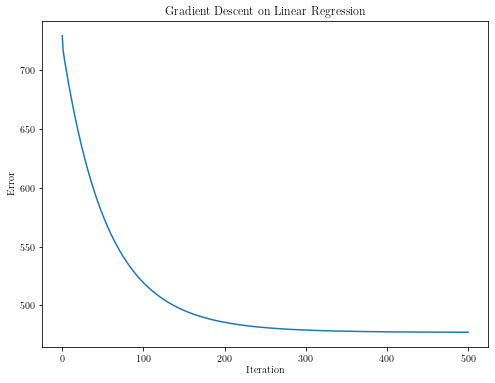

In [16]:
fig_gd_iterError = plt.figure(figsize=(8,6))
plt.plot(iterError_gd)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Gradient Descent on Linear Regression')

In [17]:
fig_gd_iterError.savefig('report/Figures/gd_iterError.pdf')

## Stochastic Gradient Descent

In [18]:
w_sgd = rng.random(p)
learning_rate_sgd = 0.005
maxIter_sgd = 5000
iterError_sgd = np.zeros(maxIter_sgd+1)

iterError_sgd[0] = (y - X@w_sgd).T @ (y - X@w_sgd)

for i in range(maxIter_sgd):
    j = rng.integers(low=0, high=y.shape[0])
    x_iter = X[j] # random sample of X
    y_iter = y[j] # random sample of Y

    error_diff_sgd = -(y_iter - w_sgd.T@x_iter) * x_iter # derivative of error
    w_sgd -= learning_rate_sgd * error_diff_sgd # sgd update
    iterError_sgd[i+1] = (y - X@w_sgd).T @ (y - X@w_sgd) # error
    
y_sgd = X @ w_sgd

[Text(441.7575409353595, 0.5, 'Estimated Weights'),
 Text(0.5, 25.14432328961706, 'True Weights')]

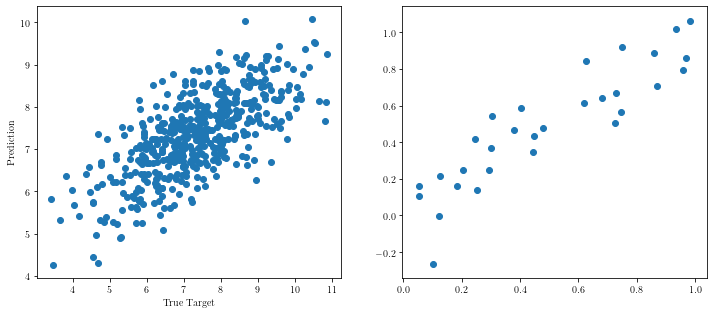

In [19]:
fig_sgd_results, ax_sgd_results = plt.subplots(1, 2, figsize=(12, 5))
ax_sgd_results[0].scatter(y, y_closed)
ax_sgd_results[0].set(xlabel='True Target', ylabel='Prediction')
ax_sgd_results[1].scatter(w, w_closed)
ax_gd_results[1].set(xlabel='True Weights', ylabel='Estimated Weights')

In [20]:
fig_sgd_results.savefig('report/Figures/sgd_results.pdf')

Text(0.5, 1.0, 'Stochastic Gradient Descent on Linear Regression')

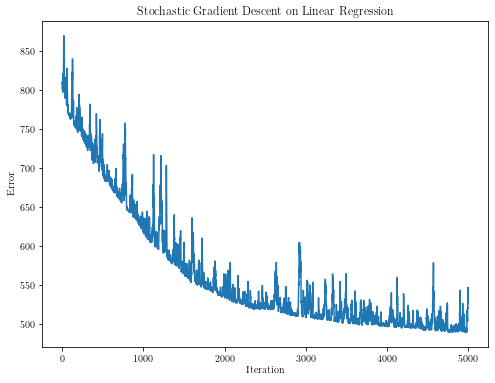

In [21]:
fig_sgd_iterError = plt.figure(figsize=(8,6))
plt.plot(iterError_sgd)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Stochastic Gradient Descent on Linear Regression')

In [22]:
fig_sgd_iterError.savefig('report/Figures/sgd_iterError.pdf')

In [23]:
df_y = pd.DataFrame(data={'y': y, 'y_closed': y_closed, 'y_gd': y_gd, 'y_sgd': y_sgd})
y_corr = df_y.corr(method='pearson')
y_corr

,y,y_closed,y_gd,y_sgd
y,1.000000,0.704550,0.704451,0.695540
y_closed,0.704550,1.000000,0.999854,0.987167
y_gd,0.704451,0.999854,1.000000,0.988109
y_sgd,0.695540,0.987167,0.988109,1.000000


In [24]:
df_w = pd.DataFrame(data={'w': w, 'w_closed': w_closed, 'w_gd': w_gd, 'w_sgd': w_sgd})
w_corr = df_w.corr(method='pearson')
w_corr

,w,w_closed,w_gd,w_sgd
w,1.000000,0.901110,0.901576,0.911628
w_closed,0.901110,1.000000,0.999364,0.936161
w_gd,0.901576,0.999364,1.000000,0.939402
w_sgd,0.911628,0.936161,0.939402,1.000000


In [25]:
df = pd.concat((y_corr['y'], w_corr['w']), axis=1)
df

,y,w
y,1.000000,NaN
y_closed,0.704550,NaN
y_gd,0.704451,NaN
y_sgd,0.695540,NaN
w,NaN,1.000000
w_closed,NaN,0.901110
w_gd,NaN,0.901576
w_sgd,NaN,0.911628


In [26]:
df_corr = pd.read_csv('task_1_corr.csv', index_col=0)
df_corr

,Target,Weights
Ground Truth,1.000000,1.000000
Closed Form,0.704550,0.901110
GD,0.704474,0.901734
SGD,0.695540,0.911628


In [27]:
print(df_corr.to_latex(caption='Table of correlation against ground truth', label="tab:task1_corr"))

\begin{table}
\centering
\caption{Table of correlation against ground truth}
\label{tab:task1_corr}
\begin{tabular}{lrr}
\toprule
{} &    Target &   Weights \\
\midrule
Ground Truth &  1.000000 &  1.000000 \\
Closed Form  &  0.704550 &  0.901110 \\
GD           &  0.704474 &  0.901734 \\
SGD          &  0.695540 &  0.911628 \\
\bottomrule
\end{tabular}
\end{table}



# Task 2
Recursive Least Squares

In [28]:
w_rls = np.zeros((p, 1))
lambda_rls = 0.99
P = np.identity(p)
iterError_rls = np.zeros(y.shape[0]+1)

iterError_rls[0] = (y[0] - X[0].T @ w_rls)**2

for i, (x_n, y_n) in enumerate(zip(X, y)):
    x_n = x_n.reshape(-1, 1)

    error = y_n - x_n.T @ w_rls
    k_n = P @ x_n / (lambda_rls + x_n.T @ P @ x_n)
    P = (P - k_n @ x_n.T @ P) / lambda_rls
    w_rls += k_n * error
    iterError_rls[i+1] = (y_n - x_n.T @ w_rls)**2
    
y_rls = X @ w_rls

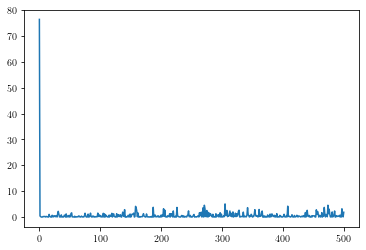

In [29]:
plt.plot(iterError_rls)